##### Bike Sharing

##### Key info:
#####  Which variables are significant in predicting the demand for shared bikes.
#####  How well those variables describe the bike demands

##### The model should be built taking this 'cnt' as the target variable.

##### Calculate
##### calculate the R-squared score on the test set using
##### from sklearn.metrics import r2_score
##### r2_score(y_test, y_pred)


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

pd.options.display.float_format = '{:.4f}'.format

In [2]:
bs = pd.read_csv("day.csv")

In [3]:
# see the data
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [4]:
bs.shape

(730, 16)

In [5]:
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


In [6]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# dteday is redundant
bs.drop(['dteday'], axis = 1, inplace = True)

In [8]:
# Drop instant column just index
bs.drop(['instant'], axis = 1, inplace = True)

In [9]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [10]:
# find null count %age
def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [11]:
find_NaN(bs)

,Cnt_of_Nulls,Null_Percentage
season,0,0.0000
yr,0,0.0000
mnth,0,0.0000
holiday,0,0.0000
weekday,0,0.0000
workingday,0,0.0000
weathersit,0,0.0000
temp,0,0.0000
atemp,0,0.0000
hum,0,0.0000


In [12]:
# Avoid multicollinearity delete the columns 'casual' and 'registered' they are summed as 'cnt'.
bs.drop(['casual','registered'], axis=1, inplace=True)

In [13]:
# univariate analysis
def univariate(df, col):
        sns.set(style="darkgrid")
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
    
        sns.distplot(df[col],ax=ax[0])    
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        sns.boxplot(data =df, y=col,ax=ax[2],orient='v')
    
        plt.show()

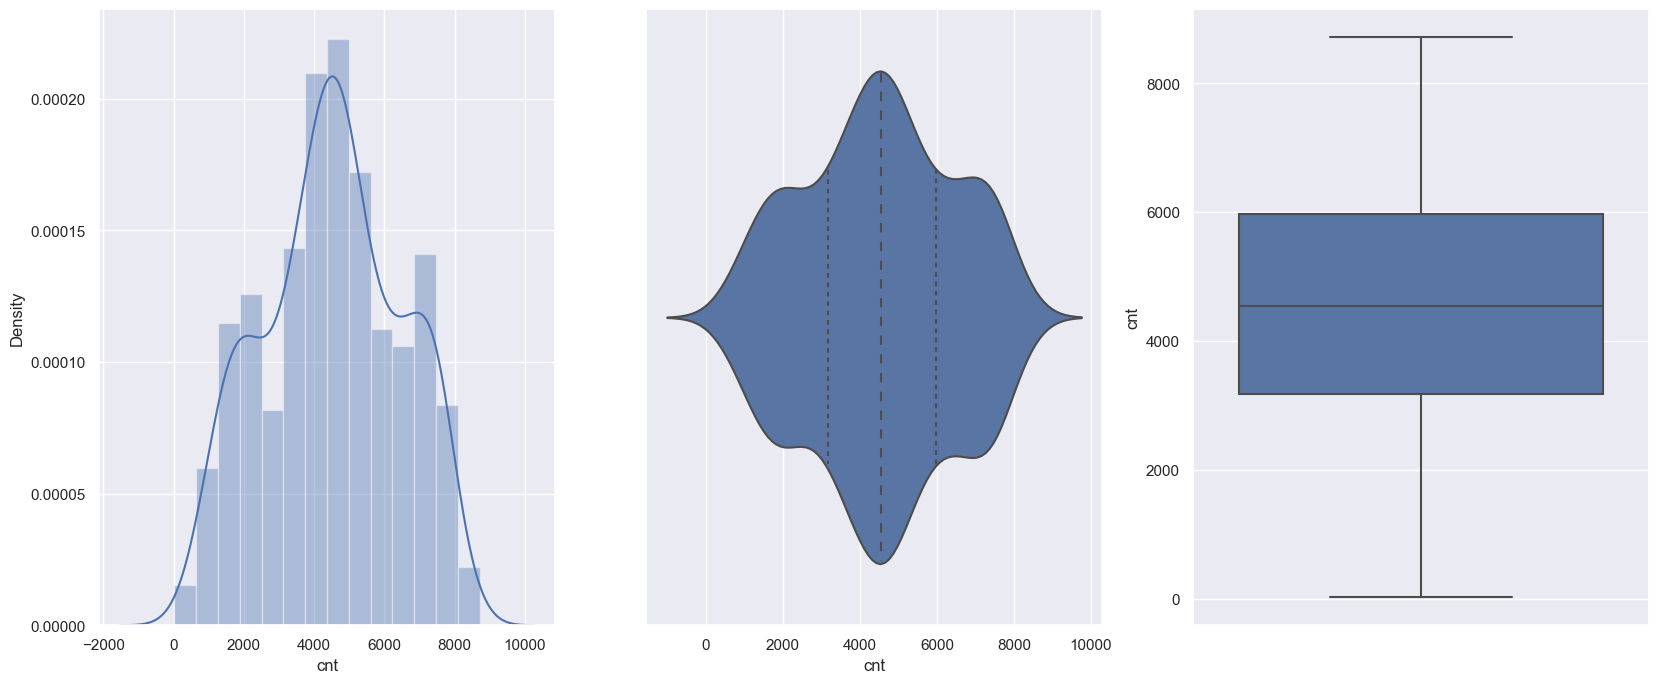

In [14]:
# univariate cnt
univariate(df=bs,col='cnt')

##### Normal distribution

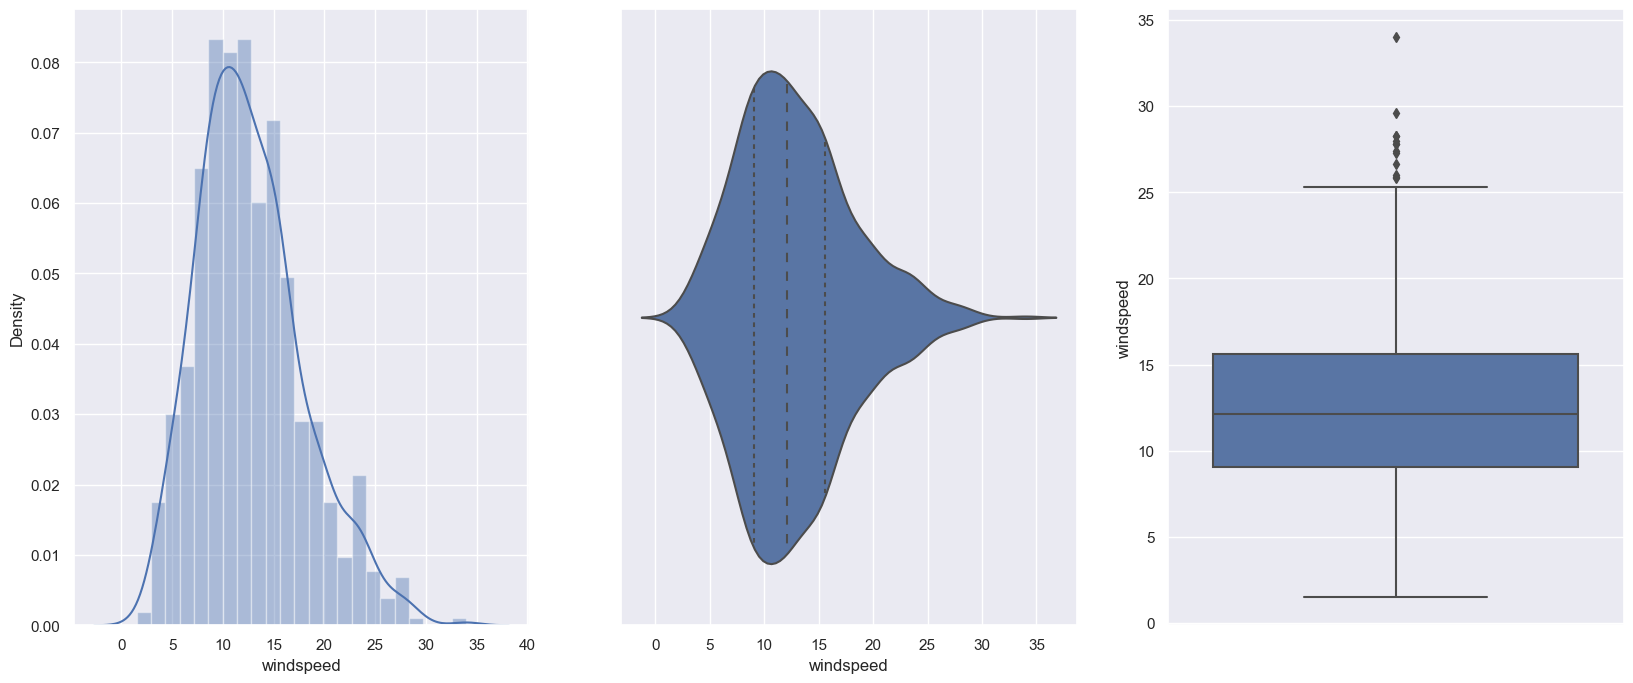

In [15]:
univariate(df=bs, col='windspeed')

##### windspeed: normal distribution

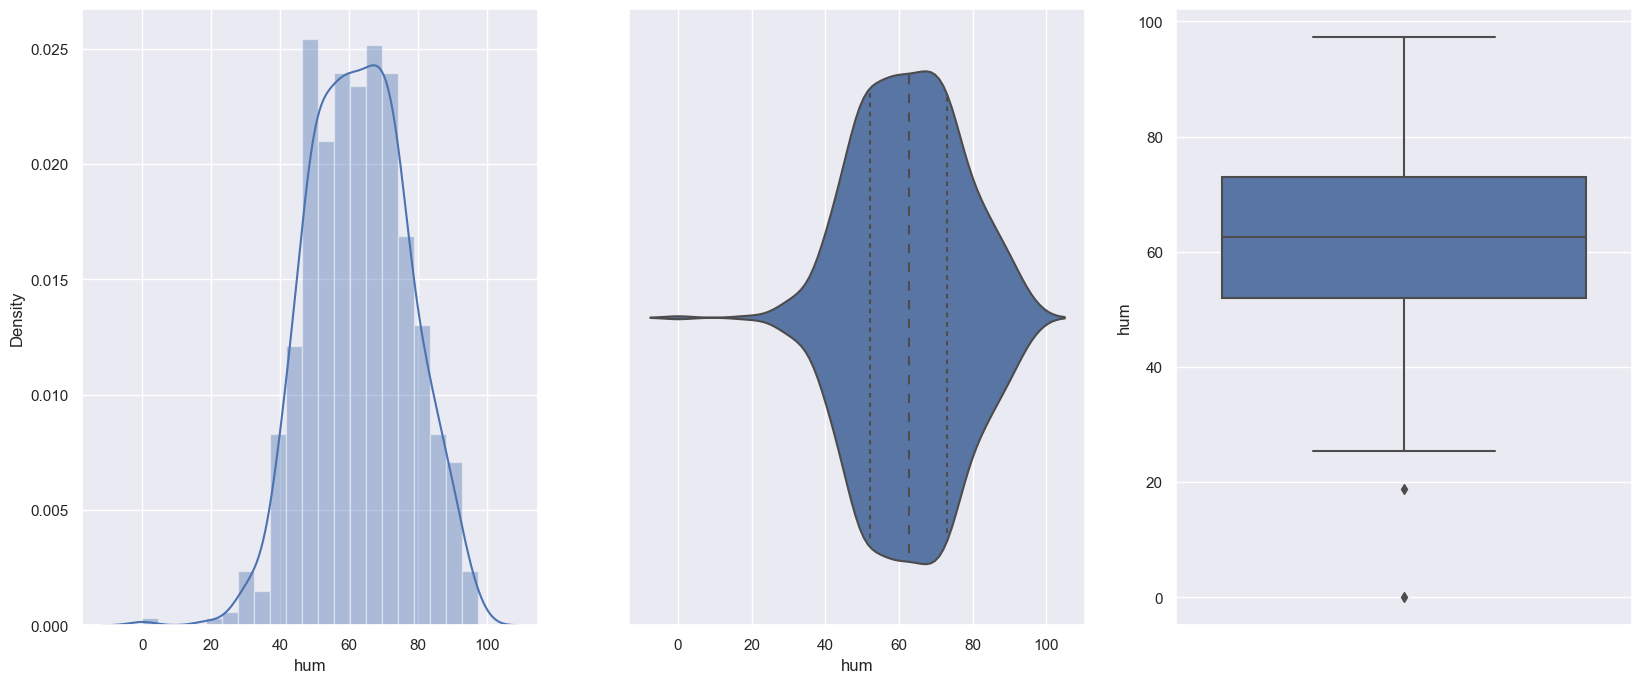

In [16]:
univariate(df=bs, col='hum')

#####  Humidity: Normal distribution

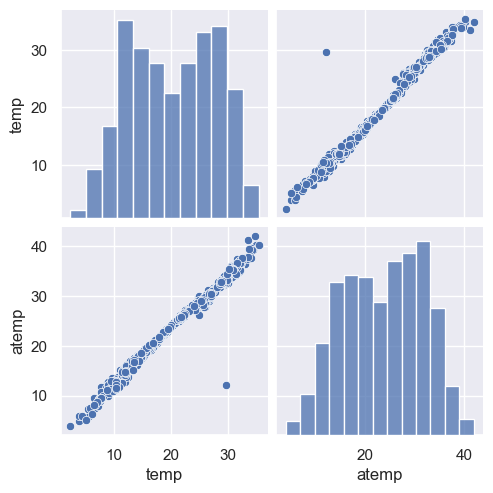

In [17]:
sns.pairplot(bs[['temp', 'atemp']])
plt.show()

##### temp and atemp are same drop one of it.

In [18]:
bs.drop(['atemp'], axis=1, inplace=True)

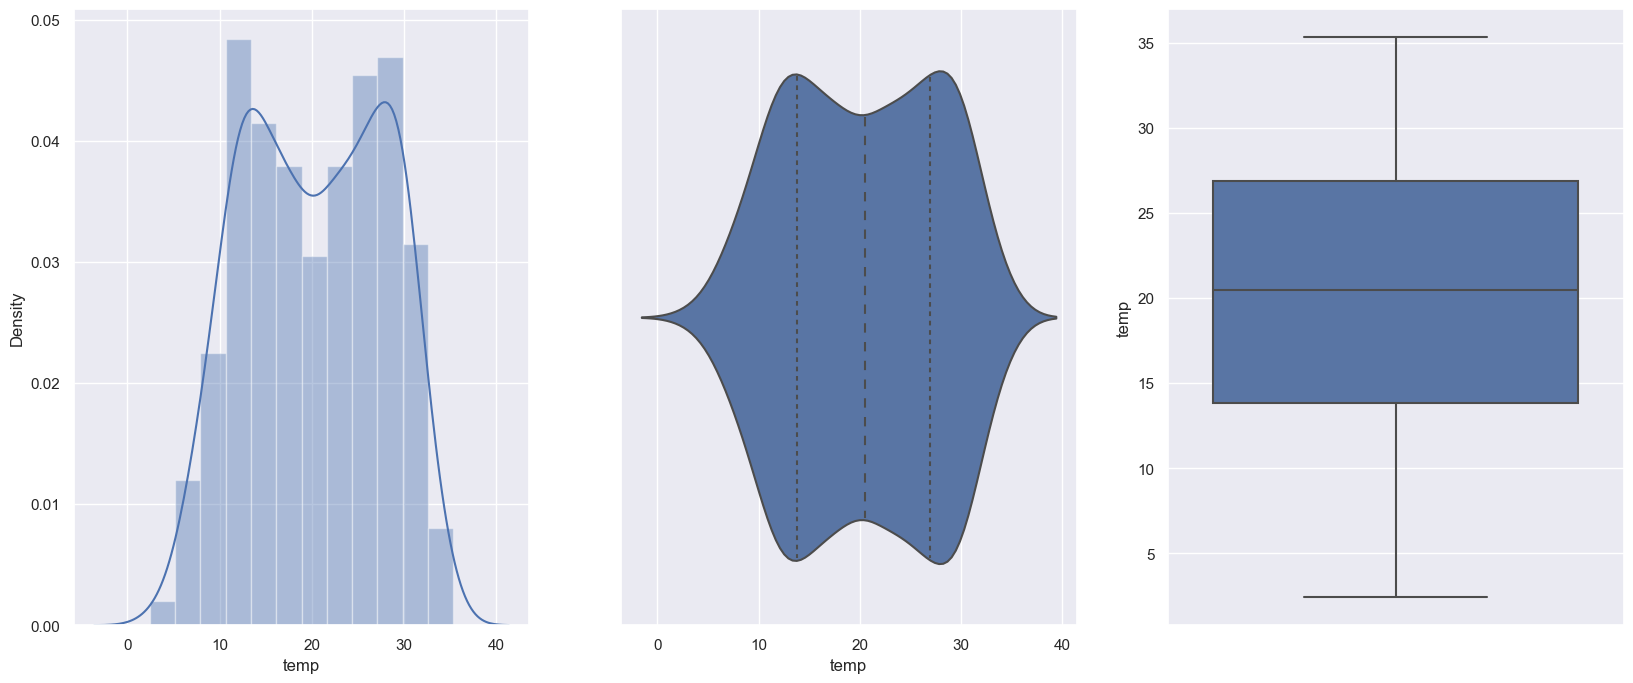

In [19]:
univariate(df=bs, col='temp')

#####  temp is almost a normal but little skewed.

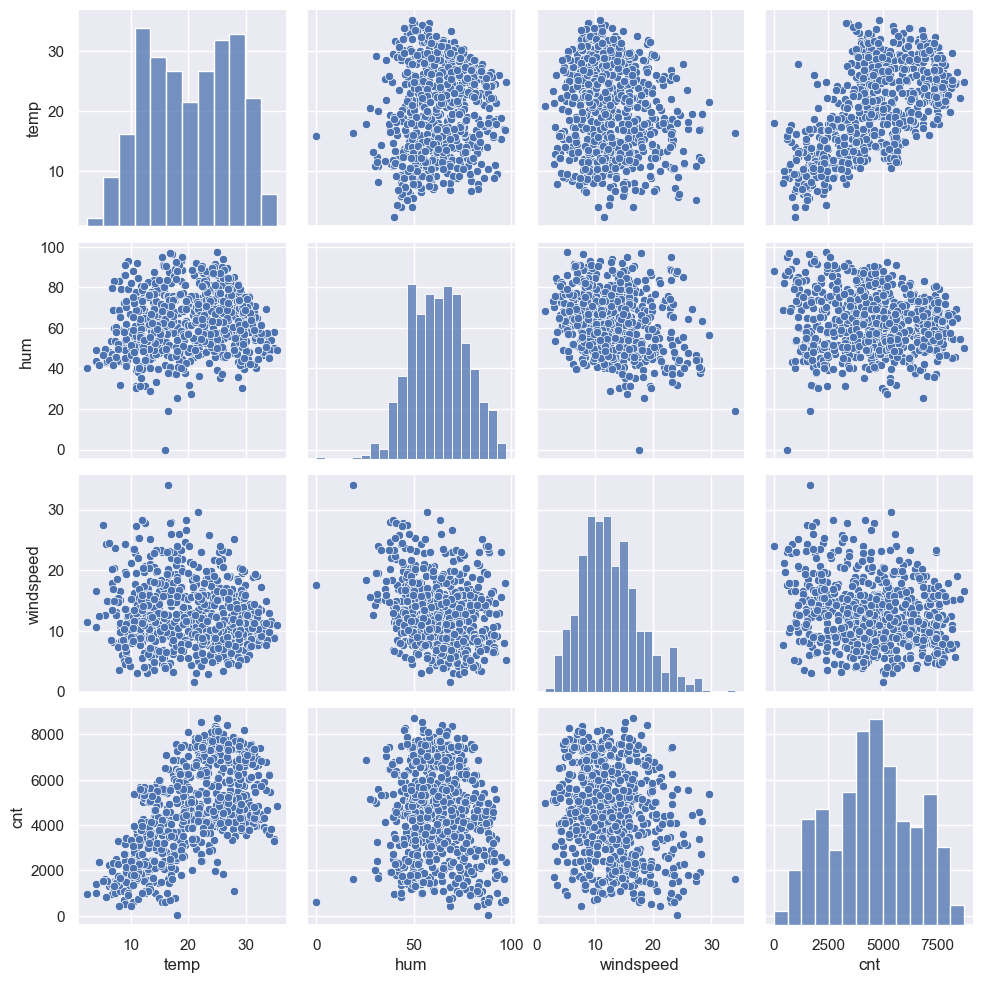

In [20]:
# Corelation
sns.pairplot(bs[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()

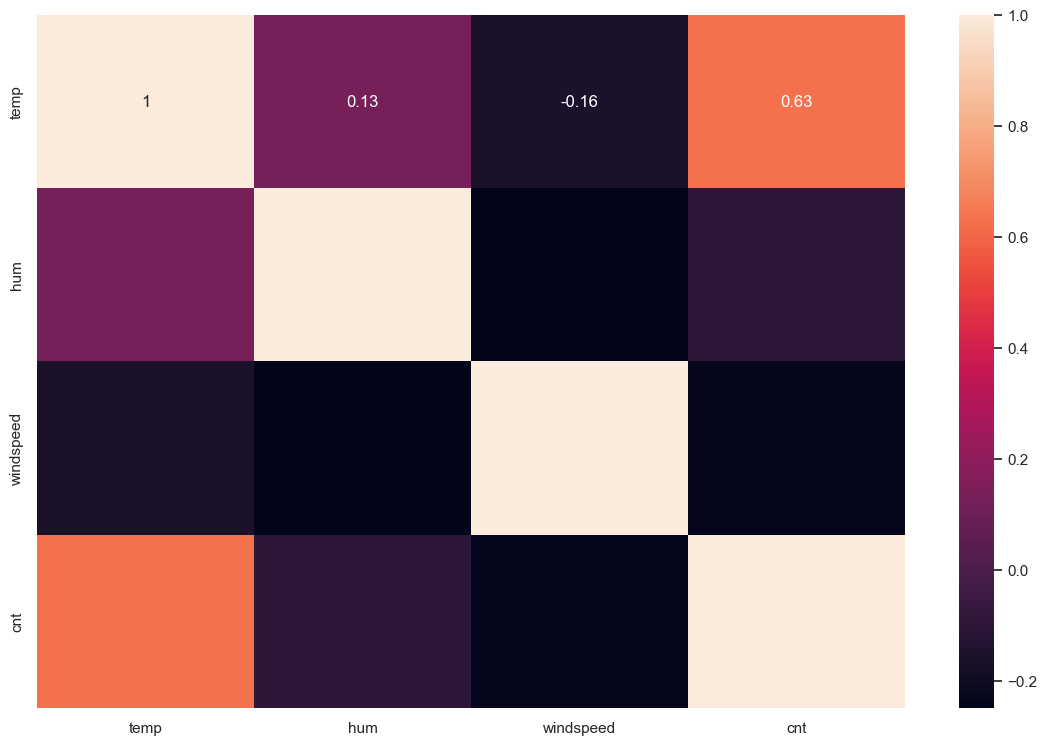

In [21]:

# heat-map
corr_df= bs[['temp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values, annot= True)
plt.show()

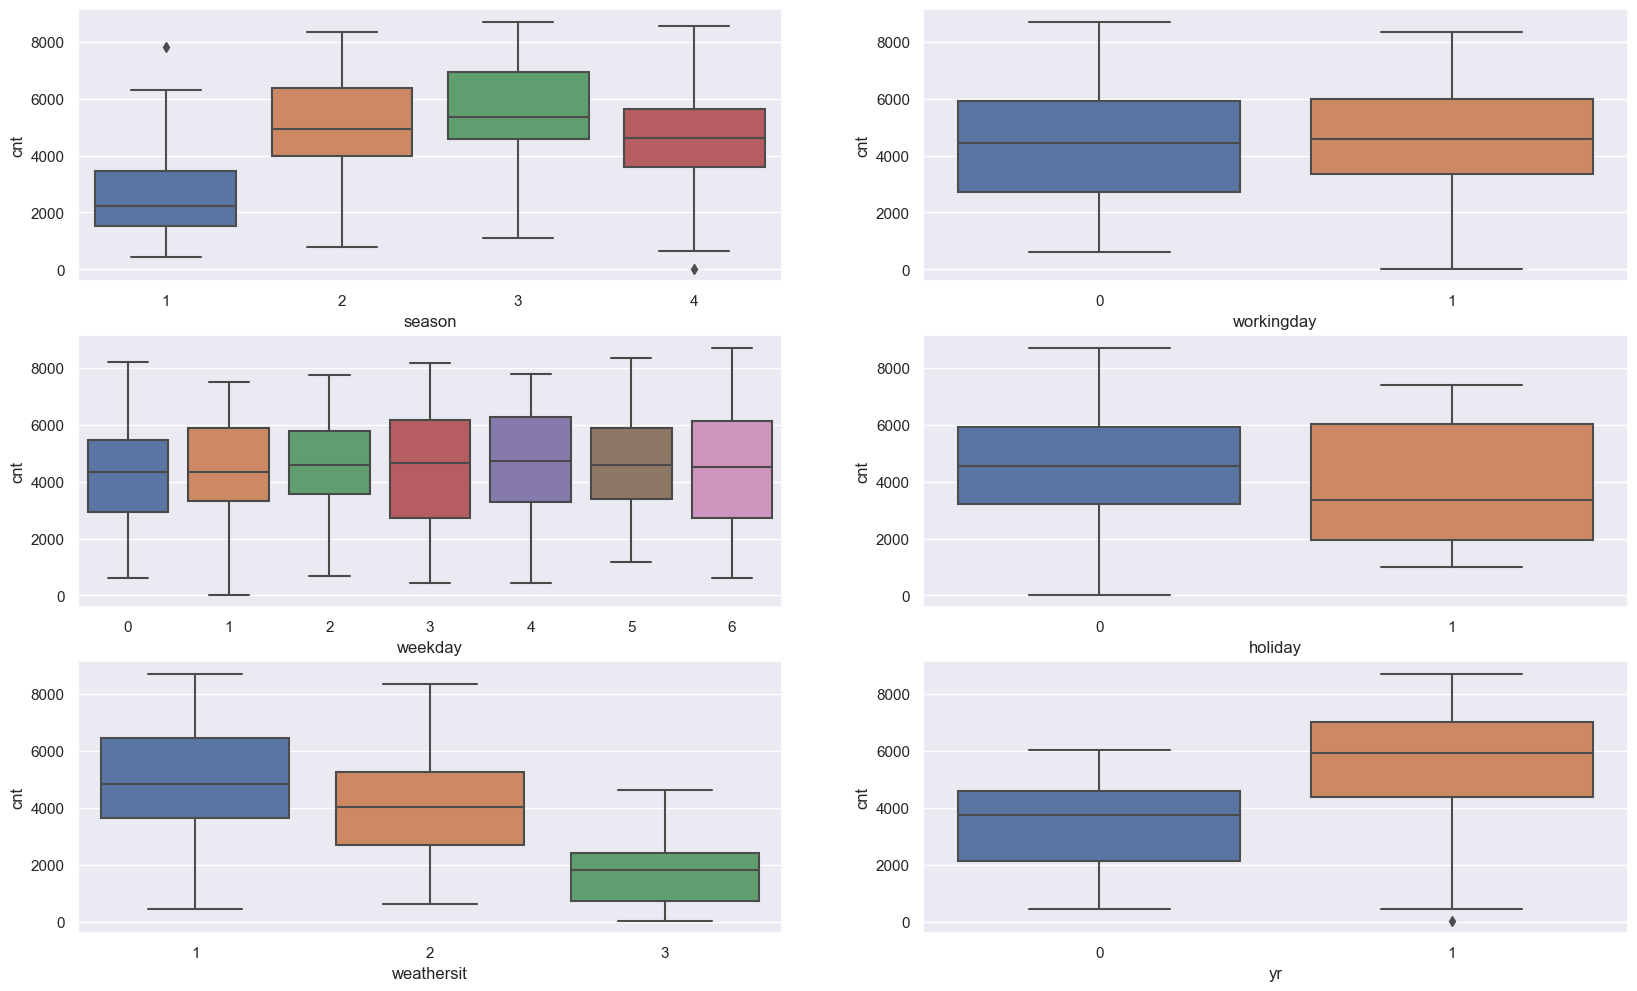

In [22]:
# Categorical Variables
plt.figure(figsize=(20, 12))

plt.subplot(3,2,1); sns.boxplot(x = 'season', y = 'cnt', data = bs)
plt.subplot(3,2,2); sns.boxplot(x = 'workingday', y = 'cnt', data = bs)
plt.subplot(3,2,3); sns.boxplot(x = 'weekday', y = 'cnt', data = bs)
plt.subplot(3,2,4); sns.boxplot(x = 'holiday', y = 'cnt', data = bs)
plt.subplot(3,2,5); sns.boxplot(x = 'weathersit', y = 'cnt', data = bs)
plt.subplot(3,2,6); sns.boxplot(x = 'yr', y = 'cnt', data = bs)

plt.show()

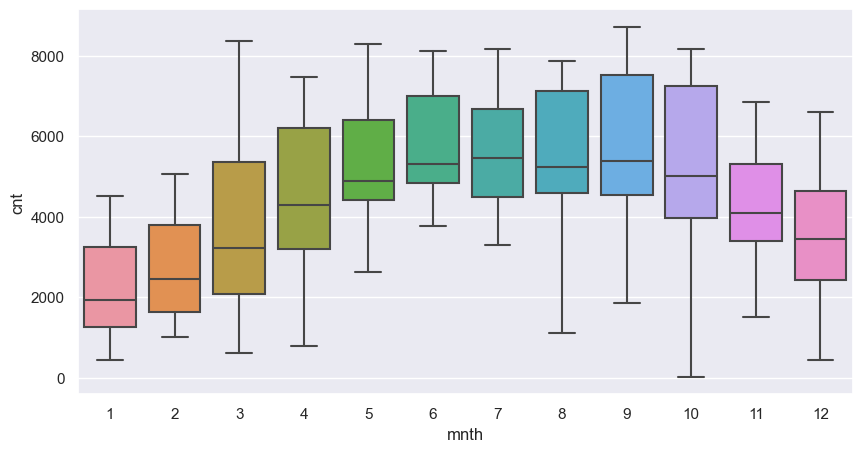

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = bs)
plt.show()

In [24]:
bs.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [25]:
def ass_season(x):
    if x == 1:
        return 'spring'
    elif x == 2 :
        return 'summer'
    elif x == 3 :
        return 'fall'
    else:
        return 'winter'
    
bs['season'] = bs['season'].apply(ass_season)

In [26]:
bs.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [27]:
bs.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [28]:
def ass_month(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'})

bs['mnth']=bs[['mnth']].apply(ass_month)

In [29]:
bs.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [30]:
bs.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.1108,80.5833,10.7499,985
1,spring,0,Jan,0,0,0,2,14.9026,69.6087,16.6521,801


In [31]:
def ass_year(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

bs['yr'] = bs['yr'].apply(ass_year)

In [32]:
bs.yr.value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [33]:
def ass_weekday(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bs['weekday']=bs[['weekday']].apply(ass_weekday)

In [34]:
bs.weekday.value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

In [35]:
def ass_weather(x):
    return x.map({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})

bs['weathersit']= bs[['weathersit']].apply(ass_weather)

In [36]:
bs.weathersit.value_counts()

weathersit
Clear          463
Mist_Cloudy    246
Light_Snow      21
Name: count, dtype: int64

In [37]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.1108,80.5833,10.7499,985
1,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.9026,69.6087,16.6521,801
2,spring,2018,Jan,0,Mon,1,Clear,8.0509,43.7273,16.6367,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.2000,59.0435,10.7398,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.3052,43.6957,12.5223,1600


In [38]:
# Create dummy variables on categorical variables season, yr, mnth, weekday, and weathersit
bs=pd.get_dummies(data=bs, columns=['season', 'mnth', 'yr', 'weekday', 'weathersit'], drop_first = True)

In [39]:
bs.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,0,14.1108,80.5833,10.7499,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,0,14.9026,69.6087,16.6521,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0,1,8.0509,43.7273,16.6367,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,1,8.2000,59.0435,10.7398,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,1,9.3052,43.6957,12.5223,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [40]:
bs.shape

(730, 29)

In [41]:
# Split the dataset to Train and Test data 70% and 30%
np.random.seed(0)
bs_train, bs_test = train_test_split(bs, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
print("Train dataframe : ",bs_train.shape)
print("Test dataframe : ",bs_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


In [43]:
# Re-scale the numerical features using Standard Scaler
# If you observe windspeed, hum,temp and cnt have larger integer values, we can rescale the variables so that they have a comparable scale.
# scaler = StandardScaler()
# We can apply scaller to all columns except dummy variables
# scale_columns=['cnt','temp','hum','windspeed']
# bs_train[scale_columns] = scaler.fit_transform(bs_train[scale_columns])

In [44]:
bs_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
653,0,1,19.2017,55.8333,12.2088,7534,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
576,0,1,29.2467,70.4167,11.0835,7216,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
426,0,0,16.9808,62.1250,10.7923,4066,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True
728,0,0,10.4892,48.3333,23.5005,1796,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
482,0,0,15.4433,48.9583,8.7083,4220,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True


In [45]:
bs_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.0255,0.6765,20.1024,63.1129,12.8313,4486.3824
std,0.1578,0.4683,7.4312,14.1566,5.2918,1952.1587
min,0.0000,0.0000,2.4243,0.0000,2.8344,22.0000
25%,0.0000,0.0000,13.6069,52.2708,9.0419,3120.0000
50%,0.0000,1.0000,20.2096,63.4375,12.0832,4530.0000
75%,0.0000,1.0000,26.6158,73.2500,15.7509,5973.5000
max,1.0000,1.0000,35.3283,97.0417,34.0000,8714.0000


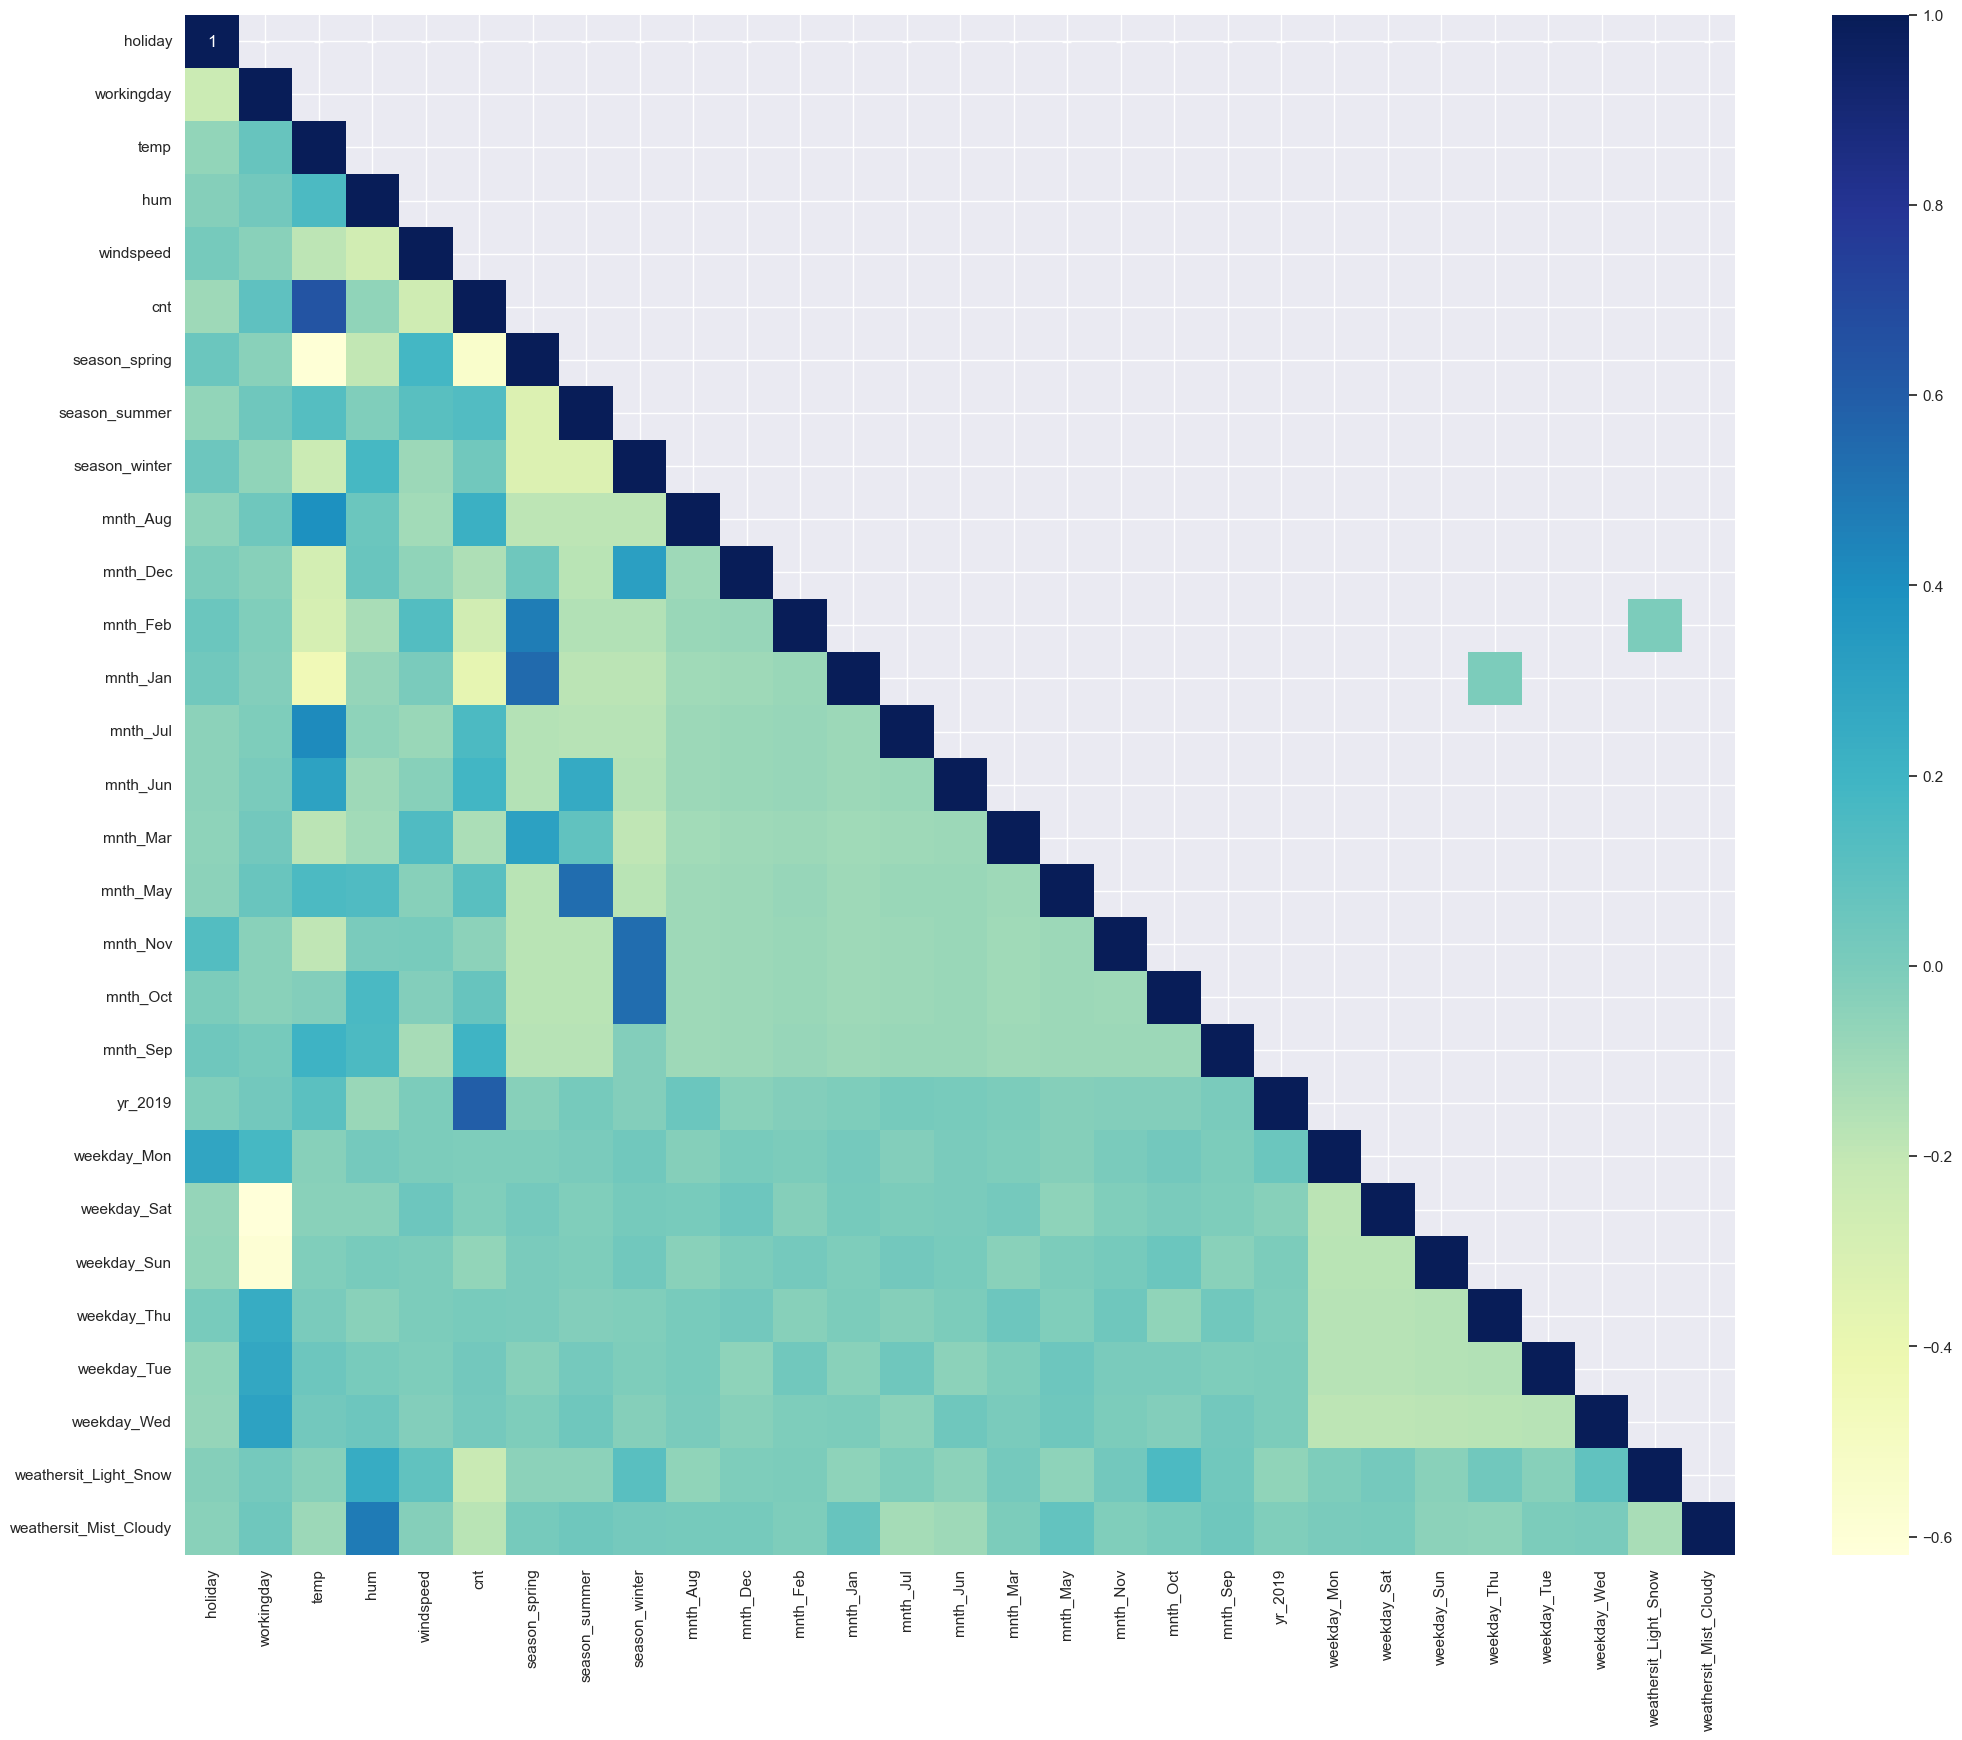

In [46]:
# correlation matrix for bs_train data
mask = np.array(bs_train.corr(method = 'spearman'))
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (25, 20))
sns.heatmap(bs_train.corr(), mask = mask, annot = True, cmap = "YlGnBu")
plt.show()

##### temp correlated to cnt most. Next mnths, weathersit, hum, and few mnths.

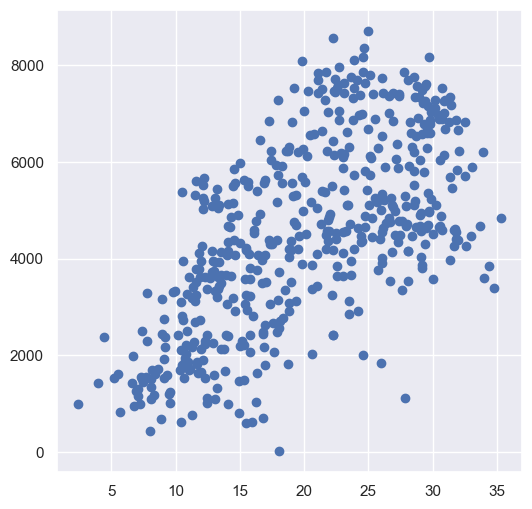

In [47]:
plt.figure(figsize=[6,6])
plt.scatter(bs_train.temp, bs_train.cnt)
plt.show()

In [48]:
# pick temp as the first variable and fit a regression line to that.
# Divide data into X and Y sets for the model building.

y_train = bs_train.pop('cnt')
X_train = bs_train

In [49]:
np.asarray(X_train)

array([[0, 1, 19.201653, ..., False, False, False],
       [0, 1, 29.246653, ..., False, False, False],
       [0, 0, 16.980847, ..., False, False, True],
       ...,
       [0, 1, 9.091299, ..., True, False, False],
       [0, 0, 10.591653, ..., False, False, True],
       [0, 1, 17.647835, ..., False, False, True]], dtype=object)

In [50]:
X_train = X_train.astype(float)

In [51]:
np.asarray(y_train)

array([7534, 7216, 4066, 1796, 4220, 1683, 6824, 7424, 6196, 4367, 6041,
       8555, 4150, 6436, 4727, 7720, 4549, 5805, 6235, 4460, 5191, 5634,
       7058, 5260, 3053, 6825, 4123, 6966, 7290, 4590, 3423, 5041, 3372,
       4511, 4991, 5010, 1495, 4375, 6784, 5810, 5375, 4097, 2294, 1204,
       5424, 4639, 6370, 6830, 6269, 7347, 4634, 7006, 4128, 4400, 5870,
       5342, 6691, 5204, 4840, 6639, 3163, 4067, 5572, 2660, 5501, 6203,
       5087, 4153, 2913, 6031, 6034, 3727, 7865, 1167, 5138, 3141, 1606,
       3907, 4541, 3777, 4708, 3767, 3243, 2416, 1526, 3071, 4304, 4390,
       2496, 1712, 1510, 3659, 7363, 5558, 5423, 1107, 1317, 5117, 4154,
       3351, 1817, 3228,  754, 2227, 7375, 6207, 1944, 1812, 4592, 6869,
       7693, 4687, 2252,  801, 5169, 3249, 1589, 5146, 2475, 3310, 4352,
       1416, 3811, 1543, 7410, 5259, 3613, 4763, 4803, 4881,  959, 4891,
       2133, 3542, 1650, 5728, 5099, 4094, 4040, 3598, 2732, 4118, 3429,
       4649, 6290, 5323, 4773, 1461, 4339, 4679, 76

In [52]:
X_train.shape

(510, 28)

In [53]:
y_train.shape

(510,)

In [54]:
# Build a linear model
# first create a regression line using statsmodels

# x as a constant
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                     2034.9482
holiday                     62.7306
workingday                 818.2839
temp                       119.0215
hum                        -13.5555
windspeed                  -52.0013
season_spring             -418.5981
season_summer              336.5944
season_winter              920.0214
mnth_Aug                   125.1994
mnth_Dec                  -396.2326
mnth_Feb                  -280.5935
mnth_Jan                  -545.6541
mnth_Jul                  -350.7228
mnth_Jun                   -25.8360
mnth_Mar                     9.0845
mnth_May                   208.0860
mnth_Nov                  -363.7716
mnth_Oct                    65.4819
mnth_Sep                   704.5726
yr_2019                   2017.5498
weekday_Mon               -181.7213
weekday_Sat                813.9786
weekday_Sun                339.9552
weekday_Thu                -80.2858
weekday_Tue               -164.1905
weekday_Wed                -46.8282
weathersit_Light_Snow    -22

In [55]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          8.74e-182
Time:                        00:42:48   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2034

In [56]:
##### Dropping the Variable and Updating the Model 
##### Drop Variables: If a variable's p-value is high (> 0.05) has no impact. We can remove it from the model.

In [57]:
# high P value for mnth_March feature, drop it and re-fit model again.
X_train = X_train.drop(columns=['mnth_Mar'])
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          8.33e-183
Time:                        00:42:48   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     483   BIC:                             8364.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2039

In [58]:
# High P value for mnth_Jun drop and refit
X_train = X_train.drop(columns=['mnth_Jun'])
X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          7.84e-184
Time:                        00:42:48   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     484   BIC:                             8358.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2037

In [59]:
# High p for mnth_Oct drop and re-fit
X_train = X_train.drop(columns=['mnth_Oct'])
X_train_lm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          7.40e-185
Time:                        00:42:48   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     485   BIC:                             8352.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2052

In [60]:
# high p value for weekday_Thu, drop it and re-fit.
#X_train = X_train.drop(columns=['weekday_Thu'])
X_train = X_train.drop(columns=['holiday'])
X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          7.40e-185
Time:                        00:42:48   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     485   BIC:                             8352.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2124

In [61]:
# high p value for weekday_Sun, drop it and re-fit.
X_train = X_train.drop(columns=['weekday_Wed'])
X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          7.06e-186
Time:                        00:42:48   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     486   BIC:                             8346.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2106

In [62]:
# high p value for weekday_Sun, drop it and re-fit.
X_train = X_train.drop(columns=['weekday_Thu'])
X_train_lm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          6.87e-187
Time:                        00:42:48   Log-Likelihood:                -4098.1
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     487   BIC:                             8340.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2083

In [63]:
# high p value for weekday_Sun, drop it and re-fit.
X_train = X_train.drop(columns=['mnth_Aug'])
X_train_lm = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          7.12e-188
Time:                        00:42:48   Log-Likelihood:                -4098.3
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     488   BIC:                             8334.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2151

In [64]:
# We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again¶
X_train = X_train.drop(columns=['weekday_Tue'])
X_train_lm = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          1.09e-188
Time:                        00:42:48   Log-Likelihood:                -4098.9
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     489   BIC:                             8329.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2137

In [65]:
# We have high P value for mnth_August feature, so we can drop the column and fit the model again
X_train = X_train.drop(columns=['weekday_Mon'])
X_train_lm = sm.add_constant(X_train)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          1.59e-189
Time:                        00:42:48   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2049

In [66]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train = X_train.drop(columns=['mnth_May'])
X_train_lm = sm.add_constant(X_train)
lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          3.55e-190
Time:                        00:42:48   Log-Likelihood:                -4100.6
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     491   BIC:                             8320.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1939

In [67]:
# We have high P value for mnth_May feature, so we can drop the column and fit the model again.
X_train = X_train.drop(columns=['mnth_Feb'])
X_train_lm = sm.add_constant(X_train)
lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          9.55e-191
Time:                        00:42:48   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     492   BIC:                             8316.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1812

In [68]:
X_train = X_train.drop(columns=['weekday_Sun'])
X_train_lm = sm.add_constant(X_train)
lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          4.53e-191
Time:                        00:42:49   Log-Likelihood:                -4103.9
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     493   BIC:                             8314.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2209

In [69]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,32.4100
1,temp,22.2800
3,windspeed,6.9500
0,workingday,4.8100
4,season_spring,4.4900
6,season_winter,4.0800
5,season_summer,2.8800
15,weathersit_Mist_Cloudy,2.3400
12,yr_2019,2.1000
13,weekday_Sat,1.8700


In [70]:
X_train = X_train.drop(columns=['hum'])
X_train_lm = sm.add_constant(X_train)
lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          5.71e-189
Time:                        00:42:49   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1608

In [71]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,8.1900
2,windspeed,6.8700
0,workingday,4.7900
3,season_spring,3.2600
5,season_winter,3.1000
4,season_summer,2.4100
11,yr_2019,2.0800
12,weekday_Sat,1.8700
9,mnth_Nov,1.7800
7,mnth_Jan,1.6600


In [72]:
X_train = X_train.drop(columns=['temp'])
X_train_lm = sm.add_constant(X_train)
lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          5.05e-162
Time:                        00:42:49   Log-Likelihood:                -4178.6
No. Observations:                 510   AIC:                             8387.
Df Residuals:                     495   BIC:                             8451.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4919

In [73]:
X_train = X_train.drop(columns=['mnth_Jul'])
X_train_lm = sm.add_constant(X_train)
lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          5.30e-163
Time:                        00:42:49   Log-Likelihood:                -4178.9
No. Observations:                 510   AIC:                             8386.
Df Residuals:                     496   BIC:                             8445.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4867

In [74]:
X_train = X_train.drop(columns=['season_winter'])
X_train_lm = sm.add_constant(X_train)
lr_16 = sm.OLS(y_train, X_train_lm).fit()
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          5.41e-164
Time:                        00:42:49   Log-Likelihood:                -4179.2
No. Observations:                 510   AIC:                             8384.
Df Residuals:                     497   BIC:                             8439.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4832

In [75]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,5.0100
0,workingday,3.4700
2,season_spring,2.4100
8,yr_2019,1.9000
3,season_summer,1.8100
5,mnth_Jan,1.6300
9,weekday_Sat,1.6100
11,weathersit_Mist_Cloudy,1.5400
6,mnth_Nov,1.2400
7,mnth_Sep,1.2100


In [76]:
X_train = X_train.drop(columns=['windspeed'])
X_train_lm = sm.add_constant(X_train)
lr_17 = sm.OLS(y_train, X_train_lm).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          2.01e-155
Time:                        00:42:49   Log-Likelihood:                -4202.2
No. Observations:                 510   AIC:                             8428.
Df Residuals:                     498   BIC:                             8479.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4217

In [77]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,2.7000
1,season_spring,2.0200
7,yr_2019,1.8000
4,mnth_Jan,1.6100
2,season_summer,1.5700
10,weathersit_Mist_Cloudy,1.5300
8,weekday_Sat,1.3800
6,mnth_Sep,1.1900
3,mnth_Dec,1.1600
5,mnth_Nov,1.1600


##### The model lr_17 looks good because there are no features with P value gt 0.05 and all the features VIF is less than 3.

Text(0.5, 0, 'Errors')

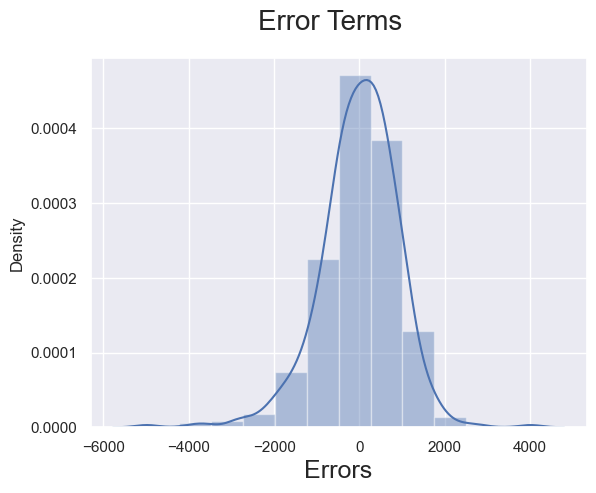

In [78]:
# Residual Analysis of the train data
y_train_pred = lr_17.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### Dividing into X_test and y_test

In [79]:
y_test = bs_test.pop('cnt')
X_test = bs_test

In [80]:
X_test.shape

(219, 28)

In [81]:
y_test.shape

(219,)

In [82]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [83]:
X_train.columns

Index(['workingday', 'season_spring', 'season_summer', 'mnth_Dec', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'yr_2019', 'weekday_Sat',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [84]:
X_test_m.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr_2019',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [85]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

#drop_cols = ['mnth_Mar','mnth_Jun','mnth_Oct','weekday_Thu','weekday_Sun','workingday','weekday_Sat',
#            'mnth_Aug','weekday_Wed','mnth_May','mnth_Feb']
drop_cols = ['mnth_Mar', 'mnth_Jun', 'mnth_Oct', 'holiday', 'weekday_Wed', 'weekday_Thu', 'mnth_Aug',
             'weekday_Tue', 'weekday_Mon', 'mnth_May', 'mnth_Feb', 'weekday_Sun', 'hum', 'temp', 'mnth_Jul',
             'season_winter', 'windspeed']

X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [87]:
y_pred_m = lr_17.predict(X_test_m)

##### Model Evaluation
##### Let's now plot the graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

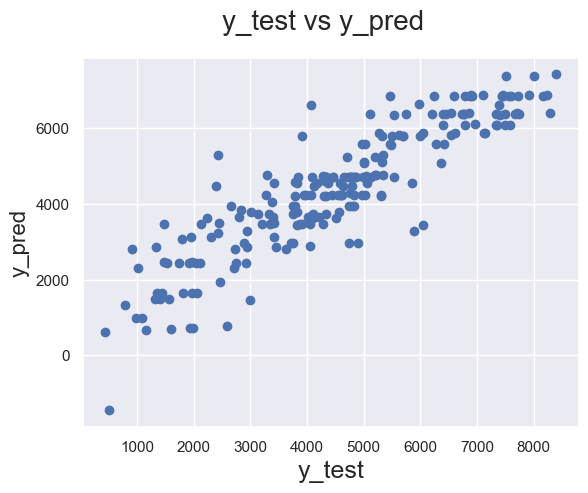

In [88]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

##  R-squared score

In [89]:
from sklearn.metrics import r2_score

print('Train R-Score: ', r2_score(y_train, y_train_pred))  # R score for train data
print('Test R-Score: ', r2_score(y_test, y_pred_m))

Train R-Score:  0.7791033109205738
Test R-Score:  0.796570377646888


In [90]:
X_train.columns

Index(['workingday', 'season_spring', 'season_summer', 'mnth_Dec', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'yr_2019', 'weekday_Sat',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [ ]:
const                   4217.9037    128.907     32.720      0.000    3964.634    4471.173
workingday               506.2492    112.523      4.499      0.000     285.171     727.327
season_spring          -2288.2683    125.826    -18.186      0.000   -2535.484   -2041.052
season_summer           -479.6203    112.117     -4.278      0.000    -699.901    -259.340
mnth_Dec                -979.0227    155.628     -6.291      0.000   -1284.790    -673.255
mnth_Jan                -934.4481    175.723     -5.318      0.000   -1279.698    -589.198
mnth_Nov               -1057.6352    159.001     -6.652      0.000   -1370.030    -745.240
mnth_Sep                 533.0073    163.439      3.261      0.001     211.893     854.122
yr_2019                 2128.1787     82.555     25.779      0.000    1965.980    2290.377
weekday_Sat              547.7888    145.189      3.773      0.000     262.529     833.048
weathersit_Light_Snow  -2956.1001    246.824    -11.977      0.000   -3441.045   -2471.155
weathersit_Mist_Cloudy  -773.3451     87.946     -8.793      0.000    -946.135    -600.555

## Significant variables to predict the demand for shared bikes

Positive correlation:
* Workingday
* Months (Sep)
* Year 2019
* Weekday_Sat

Negative correlation:
* Season (spring, summer)
* Months (Dec, Jan, Nov)
* Weathersit (Light_Snow, Mist_Cloudy)

The Top 3 features contributing significantly towards the demands of share bikes are: 
* weathersit_Light_Snow (negative correlation)
* season_spring (negative correlation)
* yr_2019 (positive correlation)
* mnth_Nov (negative correlation)